## Convolutional Neural Network:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from keras.utils import to_categorical
from keras.optimizers import Adam,RMSprop
import pickle
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score,StratifiedKFold, train_test_split
import cv2
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

### Loading Data from pkl files:

In [3]:
train_df = pd.read_pickle("Train.pkl")
test_df  = pd.read_pickle("Test.pkl")
feature_columns = [i for i in range(784)]
trainX = train_df[feature_columns]
trainY = train_df['label']
testX  = test_df[feature_columns]
testY  = test_df['label']

In [4]:
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(20020, 784) (20020,)
(8580, 784) (8580,)


### Reshaping Data:

In [5]:
trainX = np.array(trainX).reshape((trainX.shape[0], 28, 28, 1))
testX = np.array(testX).reshape((testX.shape[0], 28, 28, 1))
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(20020, 28, 28, 1) (20020,)
(8580, 28, 28, 1) (8580,)


In [6]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(20020, 28, 28, 1) (20020, 26)
(8580, 28, 28, 1) (8580, 26)


In [7]:
# Scaling:
trainX = trainX/255.0
testX = testX/255.0

(28, 28, 1)


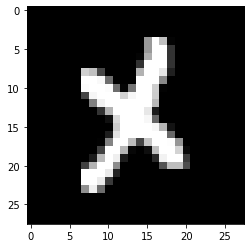

In [8]:
img = trainX[0]
print(img.shape)
plt.imshow(img[:,:,0], cmap='gray')
plt.show()

##### Saving CNN Data to Disk:

In [9]:
np.save('TrainX',trainX)
np.save('TestX',testX)
np.save('trainY',trainY)
np.save('testY',testY)

In [10]:
'''
TrainX = np.load('TrainX.npy')
'''

"\nTrainX = np.load('TrainX.npy')\n"

### CNN Architecture:

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1) ))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(26, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 26)                3354      
Total params: 696,026
Trainable params: 696,026
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
history = model.fit(trainX, trainY, epochs=10, batch_size=512, validation_data=(testX, testY), verbose=1)

Train on 20020 samples, validate on 8580 samples
Epoch 1/10
20020/20020 [==============================] - 9s 439us/step - loss: 1.0761 - accuracy: 0.7033 - val_loss: 0.5163 - val_accuracy: 0.8543
Epoch 2/10
20020/20020 [==============================] - 8s 417us/step - loss: 0.4251 - accuracy: 0.8813 - val_loss: 0.3592 - val_accuracy: 0.9023
Epoch 3/10
20020/20020 [==============================] - 8s 396us/step - loss: 0.2930 - accuracy: 0.9201 - val_loss: 0.2944 - val_accuracy: 0.9202
Epoch 4/10
20020/20020 [==============================] - 8s 399us/step - loss: 0.2164 - accuracy: 0.9443 - val_loss: 0.2529 - val_accuracy: 0.9273
Epoch 5/10
20020/20020 [==============================] - 8s 397us/step - loss: 0.1736 - accuracy: 0.9556 - val_loss: 0.2297 - val_accuracy: 0.9361
Epoch 6/10
20020/20020 [==============================] - 8s 394us/step - loss: 0.1484 - accuracy: 0.9623 - val_loss: 0.2158 - val_accuracy: 0.9413
Epoch 7/10
20020/20020 [==============================] - 8s 38

##### Plotting the Results:

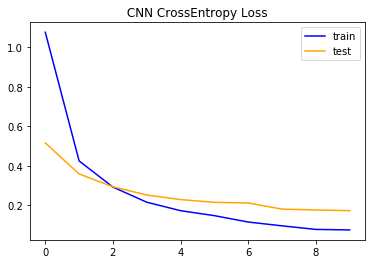

In [13]:
plt.title(" CNN CrossEntropy Loss ")
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.legend()
plt.show()

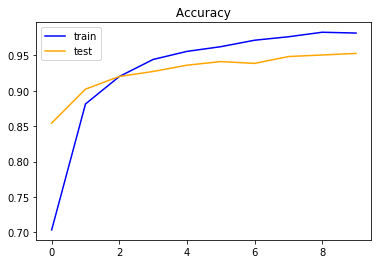

In [16]:
plt.title(" Accuracy ")
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.legend()
plt.show()

### Saving Model:

In [27]:
model.save('CNNSG13.h5')